In [69]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import pandas as pd
import numpy as np 
import seaborn as sns                 
import matplotlib.pyplot as plt             
#%matplotlib inline     
sns.set(color_codes=True)
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [70]:
df=pd.read_csv("/Users/yuyichen/Desktop/Winter 2024/INSY 695 - 075 Enterprise I/BankChurners.csv")

## Data Exploration & Preparation

In [71]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [72]:
df.info

<bound method DataFrame.info of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income

In [73]:
#data type
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [74]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [75]:
df.shape

(10127, 23)

In [76]:
df.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

In [77]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

### Unique Identifier

The 'CLIENTNUM' column has been removed from the dataset as it serves as a unique identifier for each customer, which does not provide any predictive power for the model and could potentially skew the learning process if included.

In [78]:
# Drop CLIENTNUM
df = df.drop(['CLIENTNUM'], axis=1)

## Naive_Bayes_Classifier 

The classifier is the coeffient for the model, they are dropped

In [79]:
# Drop last 2 columns
df = df.iloc[:, :-2]

# Splitting Train, Test, and Validation

In [80]:
# Split train, test, and validation
train, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

## Data Preprocessing

## Categorical Variables

Categorical variables are encoded in different methods to contain the dimensions.

Attrition_Flag: Label encoding

Gender: One-hot encoding

Education_Level: Frequency encoding

Marital_Status: Frequency encoding

Income_Category: Frequency encoding

Card_Category: One-hot encoding

In [81]:
# Encode the data: Attrition_Flag: Label encoding, Gender: One-hot encoding, Education_Level: Frequency encoding, Marital_Status: Ordinal encoding, Income_Category: Ordinal encoding, Card_Category: One-hot encoding
# Save transformed data as train_cat, val_cat, test_cat

label_encoder = LabelEncoder()
train['Attrition_Flag'] = label_encoder.fit_transform(train['Attrition_Flag'])
test['Attrition_Flag'] = label_encoder.transform(test['Attrition_Flag'])
val['Attrition_Flag'] = label_encoder.transform(val['Attrition_Flag'])

# Correcting the encoding for 'Attrition_Flag' column
# Assuming 0 represents 'Existing Customer' and 1 represents 'Attrited Customer'
train['Attrition_Flag'] = 1 - train['Attrition_Flag']
test['Attrition_Flag'] = 1 - test['Attrition_Flag']
val['Attrition_Flag'] = 1 - val['Attrition_Flag']

# One-hot encoding for Gender and Card_Category
train = pd.get_dummies(train, columns=['Gender', 'Card_Category'], drop_first=True)
test = pd.get_dummies(test, columns=['Gender', 'Card_Category'], drop_first=True)
val = pd.get_dummies(val, columns=['Gender', 'Card_Category'], drop_first=True)

# Frequency encoding for Education_Level, Marital_Status, and Income_Category
education_freq = train['Education_Level'].value_counts(normalize=True)
marital_freq = train['Marital_Status'].value_counts(normalize=True)
income_freq = train['Income_Category'].value_counts(normalize=True)

train['Education_Level'] = train['Education_Level'].map(education_freq)
test['Education_Level'] = test['Education_Level'].map(education_freq)
val['Education_Level'] = val['Education_Level'].map(education_freq)

train['Marital_Status'] = train['Marital_Status'].map(marital_freq)
test['Marital_Status'] = test['Marital_Status'].map(marital_freq)
val['Marital_Status'] = val['Marital_Status'].map(marital_freq)

train['Income_Category'] = train['Income_Category'].map(income_freq)
test['Income_Category'] = test['Income_Category'].map(income_freq)
val['Income_Category'] = val['Income_Category'].map(income_freq)


In [82]:
train.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
8098,0,53,3,0.144907,0.466821,0.137809,42,2,5,1,...,1438.3,0.895,4722,81,0.841,0.000,1,0,0,0
2366,0,44,4,0.200309,0.073765,0.349691,39,5,1,4,...,7439.0,0.958,1739,42,0.448,0.194,0,0,0,0
5678,0,43,1,0.200309,0.387963,0.137809,31,5,3,2,...,1114.0,0.620,4581,70,0.591,0.607,1,0,0,0
4259,0,41,4,0.150926,0.466821,0.152469,31,5,2,2,...,33083.0,0.758,2589,57,0.676,0.042,1,0,0,1
8192,0,50,4,0.200309,0.387963,0.349691,42,2,1,2,...,1460.0,0.682,4265,63,0.615,0.000,0,0,0,0


# Test with logistic regression model

The simple logistic regression model already has accuracy of 0.95 and recall of 0.78

In [83]:
# random forest, test accuracy and recall score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score

# Drop the target variable
X_train = train.drop('Attrition_Flag', axis=1)
X_test = test.drop('Attrition_Flag', axis=1)
X_val = val.drop('Attrition_Flag', axis=1)

# Target variable
y_train = train['Attrition_Flag']
y_test = test['Attrition_Flag']
y_val = val['Attrition_Flag']

# Create a logistic regression model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict the target variable
y_pred = rf.predict(X_test)

# Calculate the accuracy and recall score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')

Accuracy: 0.9531095755182626
Recall: 0.7798165137614679


## Oversampling

As mentioned in the EDA documentation, the data set is imbalanced. To solve this issue, over sampling was used.

In [84]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [85]:
# over sampling

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

The logistic model on the over-sampled data set has improved recall score of 0.88. This proves that over-sampling technique is necessary

In [86]:
# Create a logistic regression model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_res, y_train_res)

# Predict the target variable
y_pred = rf.predict(X_test)

# Calculate the accuracy and recall score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')

Accuracy: 0.9570582428430404
Recall: 0.8623853211009175


## Autofeat

In [87]:
pip install autofeat

Note: you may need to restart the kernel to use updated packages.


In [88]:
from autofeat import AutoFeatRegressor

af = AutoFeatRegressor()
# fit X_train_res and y_train_res
af.fit(X_train_res, y_train_res)

# transform X_train_res and X_test
X_train_res_af = af.transform(X_train_res)
X_test_af = af.transform(X_test)

/Users/yuyichen/anaconda3/envs/causalml-py38/lib/python3.8/site-packages/numpy/core/_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [98]:
X_train_res_af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10830 entries, 0 to 10829
Columns: 178 entries, Customer_Age to exp(Contacts_Count_12_mon)*exp(Total_Relationship_Count)
dtypes: float64(178)
memory usage: 14.7 MB


As shown below, using auto feat increases the number of features significantly, however, the recall score only increased by 0.003. 

It is not recommended to use autofeat.

In [99]:
# Create a logistic regression model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_res_af, y_train_res)

# Predict the target variable
y_pred = rf.predict(X_test_af)

# Calculate the accuracy and recall score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')

Accuracy: 0.9575518262586377
Recall: 0.8837920489296636


### Feature Scaling

Feature scaling has been applied to the numerical columns using `StandardScaler` to normalize the distribution of the features. 

In [100]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()

# Fit the scaler
scaler.fit(X_train_res)

# Transform X_train_res and X_test
X_train_res_scaled = scaler.transform(X_train_res)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


In [101]:
# Create a logistic regression model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_res_scaled, y_train_res)

# Predict the target variable
y_pred = rf.predict(X_test_scaled)

# Calculate the accuracy and recall score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')

Accuracy: 0.9580454096742349
Recall: 0.8623853211009175


In [102]:
# Normalize the data
from sklearn.preprocessing import Normalizer

# Normalize the data
normalizer = Normalizer()

# Fit the normalizer
X_train_res_norm = normalizer.fit_transform(X_train_res)
X_test_norm = normalizer.transform(X_test)
X_val_norm = normalizer.transform(X_val)

In [103]:
# Create a logistic regression model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_res_norm, y_train_res)

# Predict the target variable
y_pred = rf.predict(X_test_norm)

# Calculate the accuracy and recall score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')

Accuracy: 0.922507403751234
Recall: 0.7186544342507645


As shown above, standardizing and normalizing the data didn't improve on the model performance. No data transformation was performed.

## Correlation Analysis

The correlation matrix is computed to quantify the linear relationships between numerical features. This step is critical for identifying features that are closely related to each other, which can indicate redundancy. For instance, a high positive correlation between `Credit_Limit` and `Avg_Open_To_Buy` suggests that these features may convey similar information, and one of them could potentially be excluded to simplify the model. Similarly, a strong positive correlation between `Total_Trans_Amt` and `Total_Trans_Ct` indicates that as the number of transactions increases, the total transaction amount tends to increase as well. By identifying such relationships, we can prevent multicollinearity, which can obscure the interpretation of feature importance and reduce model performance.

In [104]:
# Calculate the correlation matrix for the final dataset
correlation_matrix = X_train_res.corr()

# Display the correlation matrix
correlation_matrix

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
Customer_Age,1.000000,-0.137280,-0.005382,0.039606,-0.030913,0.793633,-0.031942,0.115180,0.019305,0.010886,...,0.011131,-0.044813,-0.065687,-0.079082,-0.006399,-0.003025,-0.015175,-0.008668,0.000266,-0.009390
Dependent_count,-0.137280,1.000000,0.000562,0.012131,-0.047605,-0.113254,0.010817,-0.009509,-0.041866,0.071440,...,0.067283,-0.020096,0.037745,0.082630,0.023973,-0.000657,0.050596,0.029806,0.011296,0.027497
Education_Level,-0.005382,0.000562,1.000000,0.026062,0.023511,-0.001418,0.008717,0.012156,0.024801,0.014145,...,0.014505,0.009212,-0.001530,-0.002869,0.005728,-0.014388,-0.007390,-0.000322,-0.004389,0.018614
Marital_Status,0.039606,0.012131,0.026062,1.000000,0.003958,0.038384,0.001026,-0.013956,0.010049,-0.042395,...,-0.043911,0.038454,-0.023781,-0.050265,0.006200,0.038313,-0.016125,-0.002192,0.006126,-0.021713
Income_Category,-0.030913,-0.047605,0.023511,0.003958,1.000000,-0.031265,0.023229,0.011939,-0.042417,-0.477515,...,-0.476213,-0.028482,-0.034981,0.003066,-0.012781,0.268233,-0.538674,-0.049695,-0.007426,-0.058158
Months_on_book,0.793633,-0.113254,-0.001418,0.038384,-0.031265,1.000000,-0.021186,0.163089,0.009794,0.010000,...,0.009330,-0.046384,-0.064102,-0.059438,-0.011228,-0.011016,0.003948,-0.005735,-0.007493,-0.012304
Total_Relationship_Count,-0.031942,0.010817,0.008717,0.001026,0.023229,-0.021186,1.000000,-0.014349,0.001024,-0.051913,...,-0.060088,0.079394,-0.171769,-0.005995,0.112063,0.107584,0.050375,-0.021906,-0.023893,-0.007407
Months_Inactive_12_mon,0.115180,-0.009509,0.012156,-0.013956,0.011939,0.163089,-0.014349,1.000000,0.021391,-0.006732,...,-0.004500,-0.050390,-0.035850,-0.035400,-0.052449,-0.001112,-0.010534,-0.011448,0.000220,-0.014006
Contacts_Count_12_mon,0.019305,-0.041866,0.024801,0.010049,-0.042417,0.009794,0.001024,0.021391,1.000000,0.044417,...,0.053192,-0.044561,-0.106074,-0.151993,-0.088005,-0.099479,0.043161,-0.000086,0.002664,-0.011946
Credit_Limit,0.010886,0.071440,0.014145,-0.042395,-0.477515,0.010000,-0.051913,-0.006732,0.044417,1.000000,...,0.995340,0.022611,0.195229,0.105788,0.018022,-0.386408,0.473724,0.206345,0.073324,0.380359


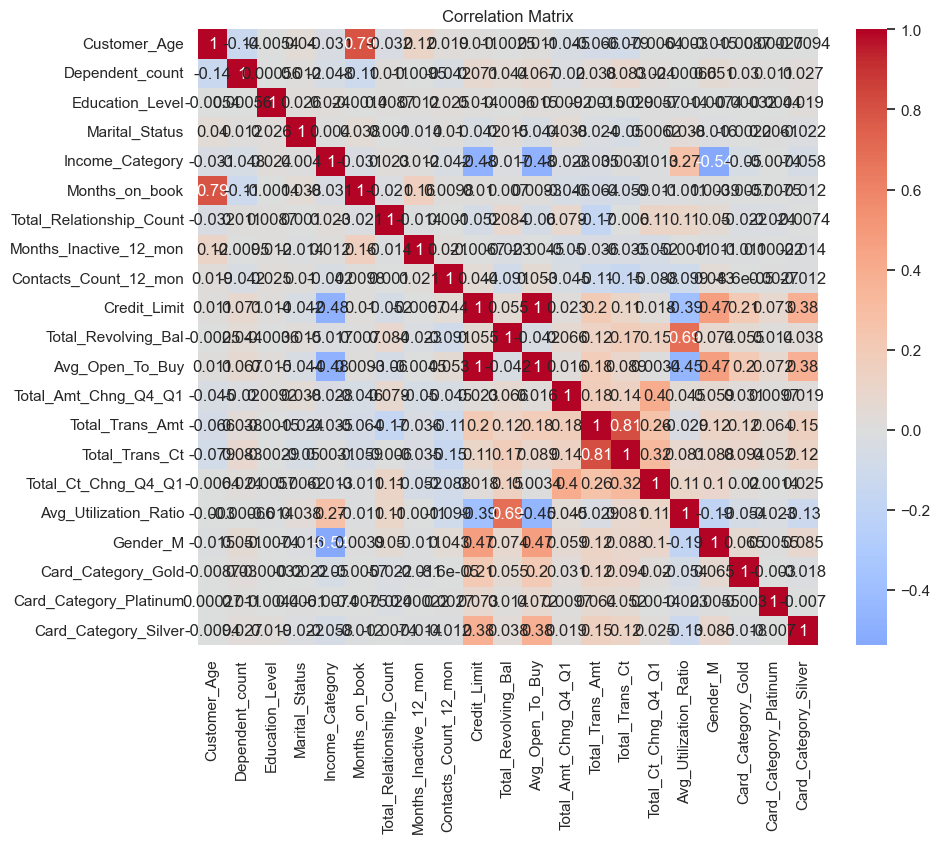

In [105]:
# Performing correlation analysis among numerical features using Pearson correlation

# Calculate the Pearson correlation matrix
corr_matrix = X_train_res.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


The correlation analysis among numerical features using Pearson correlation has identified the following highly correlated pairs:

* Credit_Limit and Avg_Open_To_Buy with a correlation coefficient of approximately 0.996. This high correlation suggests that these two features carry redundant information, as they move together very closely.

* Total_Trans_Amt (Total Transaction Amount) and Total_Trans_Ct (Total Transaction Count) with a correlation coefficient of approximately 0.807. This indicates a strong positive relationship, suggesting that as the number of transactions increases, the total amount of transactions also increases.

In [106]:
# drop highly correlated features: Months_on_book, Avg_Open_To_Buy, Total_Trans_Ct

X_train_res = X_train_res.drop(['Months_on_book', 'Avg_Open_To_Buy', 'Total_Trans_Ct'], axis=1)
X_test = X_test.drop(['Months_on_book', 'Avg_Open_To_Buy', 'Total_Trans_Ct'], axis=1)
X_val = X_val.drop(['Months_on_book', 'Avg_Open_To_Buy','Total_Trans_Ct'], axis=1)

In [107]:
print(X_train_res.columns)
print(X_test.columns)
print(X_val.columns)


Index(['Customer_Age', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Gender_M', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')
Index(['Customer_Age', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Gender_M', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')
Index(['Customer_Age', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category

## Filter Methods - Statistical Significance Testing

### Mutual Information Method

Mutual Information (MI) has been utilized to quantify the amount of information each feature shares with the target variable, `Attrition_Flag_Attrited Customer`. This method helps in identifying features that have the strongest relationships with the target variable. Features with higher MI scores are more predictive and thus are likely more important for our model. This non-linear dependency evaluation is crucial for understanding the underlying patterns in the data that may not be captured by linear methods such as correlation. The MI scores have been sorted in descending order to prioritize the features that could contribute most to the model's predictive power.

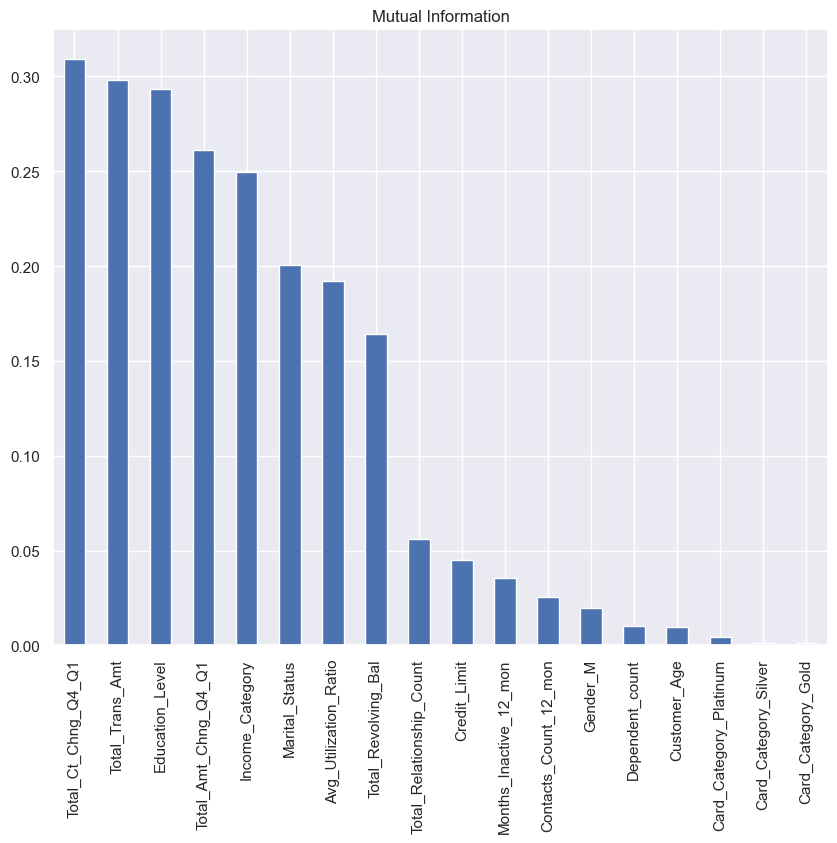

In [108]:
from sklearn.feature_selection import mutual_info_classif

# Prepare the features and target variable for mutual information
X = X_train_res
y = y_train_res

# Calculate the mutual information
mi = mutual_info_classif(X, y)

# Create a dataframe
mi_series = pd.Series(mi, index=X.columns)

# Sort the mutual information values
mi_series.sort_values(ascending=False, inplace=True)

# Plot the mutual information values
plt.figure(figsize=(10, 8))
mi_series.plot(kind='bar')
plt.title('Mutual Information')
plt.show()

## Feature Selection

Feature selection has been performed using three different methods to identify the most informative features for our predictive model:

1. **Random Forest Importance:** This method leverages the feature importance attribute provided by Random Forest models. By evaluating the contribution of each feature to the model's performance, we can rank the features based on their importance and select the top features for further analysis.

2. **Recursive Feature Elimination (RFE):** RFE is an iterative feature selection technique that recursively removes features from the dataset and evaluates the model's performance after each removal. By selecting features that contribute the most to the model's accuracy, RFE helps in identifying the subset of features that are most relevant for prediction.

3. **XGBoost Feature Importance:** XGBoost is an ensemble learning algorithm known for its effectiveness in feature selection. Similar to Random Forest, XGBoost provides a feature importance score based on the contribution of each feature to the model's performance. By ranking the features according to their importance, we can identify the key features that have the most significant impact on the predictive power of the model.


## Random Forest

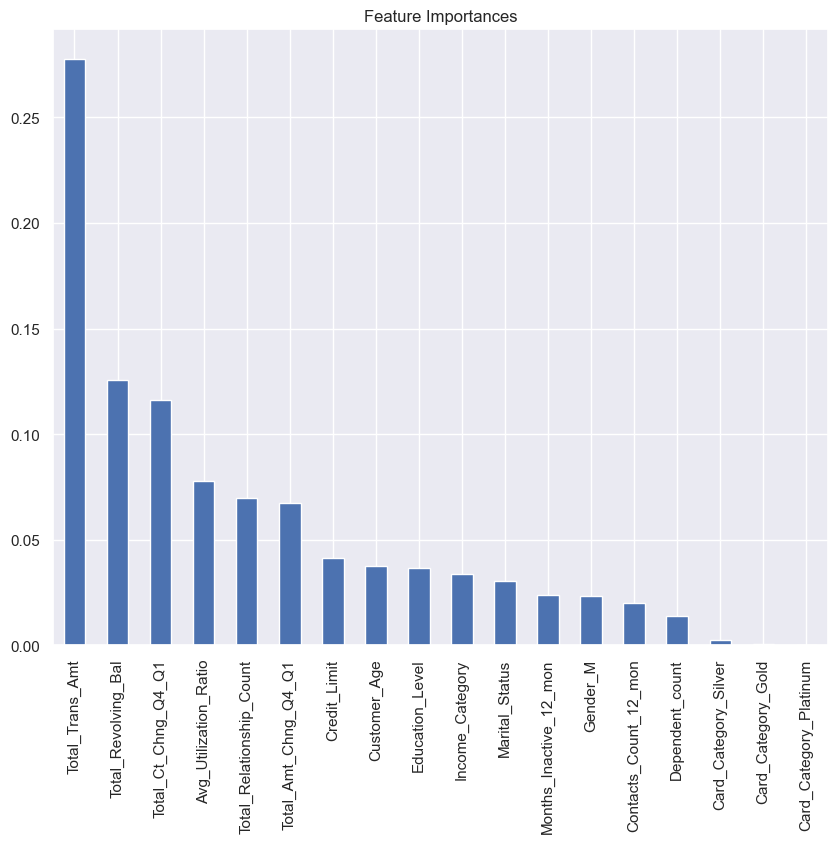

In [109]:
# Re-import necessary libraries and load the dataset, then proceed with feature importance analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Initialize the RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train_res, y_train_res)

# Obtain feature importance scores from the fitted RandomForest model
feature_importances_rf = rf_classifier.feature_importances_

# Create a dataframe
feature_importances_rf_series = pd.Series(feature_importances_rf, index=X_train_res.columns)

# Sort the feature importances
feature_importances_rf_series.sort_values(ascending=False, inplace=True)

# Plot the feature importances
plt.figure(figsize=(10, 8))
feature_importances_rf_series.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [110]:
# Drop the least important features
X_train_res = X_train_res.drop(['Card_Category_Platinum', 'Card_Category_Silver', 'Card_Category_Gold', 'Gender_M'], axis=1)
X_test = X_test.drop(['Card_Category_Platinum', 'Card_Category_Silver', 'Card_Category_Gold', 'Gender_M'], axis=1)
X_val = X_val.drop(['Card_Category_Platinum', 'Card_Category_Silver', 'Card_Category_Gold', 'Gender_M'], axis=1)


In [111]:
# Export the final datasets

X_train_res.to_csv('X_train_res.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
X_val.to_csv('X_val.csv', index=False)

y_train_res.to_csv('y_train_res.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
y_val.to_csv('y_val.csv', index=False)

## Recap

In this iteration, we followed several key steps to preprocess and prepare our data for modeling.

### Data Splitting and Encoding
- We began by splitting our dataset into training, test, and validation sets to ensure unbiased evaluation of our models.
- Categorical columns were encoded using various methods tailored to each feature's characteristics:
  - **Attrition_Flag**: Label encoding was applied.
  - **Gender** and **Card_Category**: One-hot encoding was utilized.
  - **Education_Level**, **Marital_Status**, and **Income_Category**: Frequency encoding was employed.

### Handling Imbalanced Data
- Recognizing the presence of class imbalance in our dataset, we employed the oversampling technique to address this issue. This ensures that our model is not biased towards the majority class.

### Preprocessing Techniques
- While standardization and normalization were experimented with, ultimately, they were deemed unnecessary for our specific dataset and were not incorporated into our preprocessing pipeline.

### Correlation Analysis
- We conducted correlation analysis to identify and mitigate multicollinearity issues. Highly correlated columns were identified and subsequently removed from the dataset to enhance model performance and interpretability.

### Feature Importance Testing
- To gain insights into the relative importance of features in predicting our target variable, we performed feature importance testing.
- Based on these analyses, we identified and removed four columns that were deemed to have low significance, streamlining our feature set and potentially improving model efficiency.

By diligently addressing data preprocessing, handling imbalanced data, and feature selection, we have laid a solid foundation for building robust predictive models in subsequent iterations.

# Modelling

## Supervised Learning

### (1). KNN (K-Nearest Neighbors)

### - Parameter Tuning

In [113]:
from sklearn.neighbors import KNeighborsClassifier

# K-fold cross validation for different n_neighbors
for i in range (1, 26):
    knn = KNeighborsClassifier(n_neighbors = i)
    model_knn = knn.fit(X_train_res, y_train_res)
    y_test_pred_knn = model_knn.predict(X_test)
    scores = accuracy_score(y_test, y_test_pred_knn)
    print(i, ":", scores)

1 : 0.8603158933859822
2 : 0.8736426456071076
3 : 0.849457058242843
4 : 0.8652517275419546
5 : 0.8489634748272458
6 : 0.8613030602171767
7 : 0.8450148075024679
8 : 0.8583415597235933
9 : 0.8464955577492597
10 : 0.8593287265547878
11 : 0.8464955577492597
12 : 0.8553800592300099
13 : 0.8450148075024679
14 : 0.8524185587364265
15 : 0.843040473840079
16 : 0.851431391905232
17 : 0.8415597235932872
18 : 0.8484698914116485
19 : 0.8415597235932872
20 : 0.8460019743336624
21 : 0.8435340572556762
22 : 0.849457058242843
23 : 0.84106614017769
24 : 0.8450148075024679
25 : 0.8390918065153011


### - Model Building on testdataest and validation dataset

In [146]:
# Initialize the KNN classifier with n_neightbors of highest accuracy score 
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the classifier to the resampled training data
model_KNN = knn.fit(X_train_res, y_train_res)

# Predict on the test set
y_test_pred = knn.predict(X_test)

# Evaluate the model on the test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_test_pred))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred))


# Predict on the validation set
y_val_pred = knn.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))
print("Validation Set Accuracy:", accuracy_score(y_val, y_val_pred))


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1699
           1       0.61      0.62      0.61       327

    accuracy                           0.87      2026
   macro avg       0.77      0.77      0.77      2026
weighted avg       0.87      0.87      0.87      2026

Test Set Accuracy: 0.8736426456071076
Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1386
           1       0.59      0.64      0.61       235

    accuracy                           0.88      1621
   macro avg       0.77      0.78      0.77      1621
weighted avg       0.89      0.88      0.89      1621

Validation Set Accuracy: 0.8840222085132634


### - Confusion matrix display

Confusion Matrix for Validation Set:
[[1305   81]
 [  60  175]]


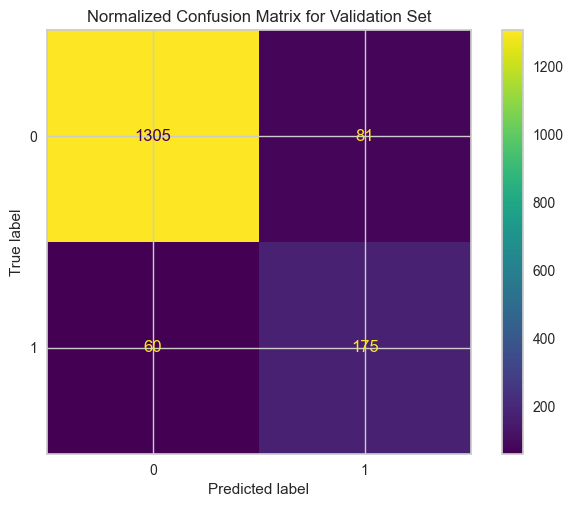


Confusion Matrix for Test Set:
[[1581  118]
 [  79  248]]


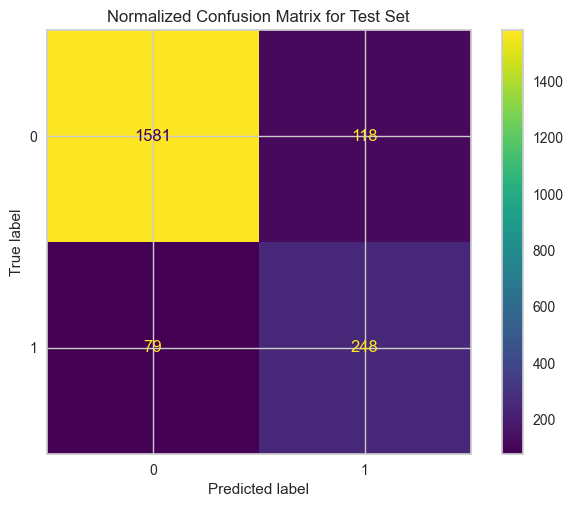

In [159]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# Assuming y_val_pred and y_val are your predicted and actual labels for the validation set
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix for Validation Set:")
print(conf_matrix_val)

# Normalized for the validation set
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred)
plt.title('Normalized Confusion Matrix for Validation Set')
plt.show()


# For the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Test Set:")
print(conf_matrix_test)

# Normalized for the test set
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title('Normalized Confusion Matrix for Test Set')
plt.show()


### - PR Curve

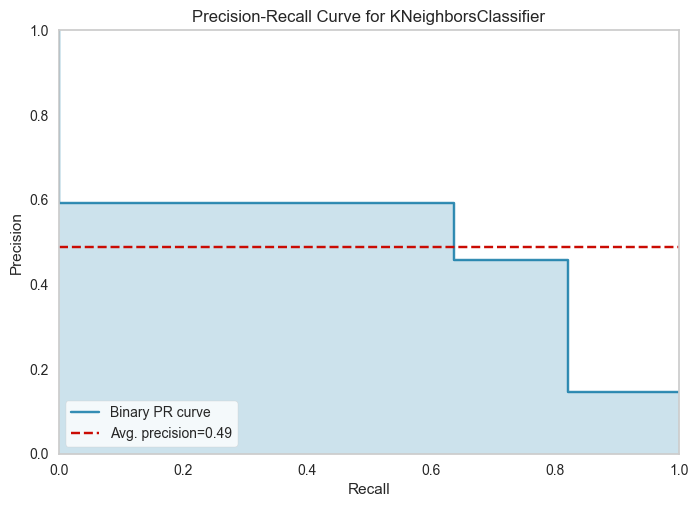

<Axes: title={'center': 'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [149]:
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt


# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_KNN, is_fitted=True)
viz.fit(X_train_res, y_train_res)
viz.score(X_val, y_val)
viz.show()

### - ROC-AUC

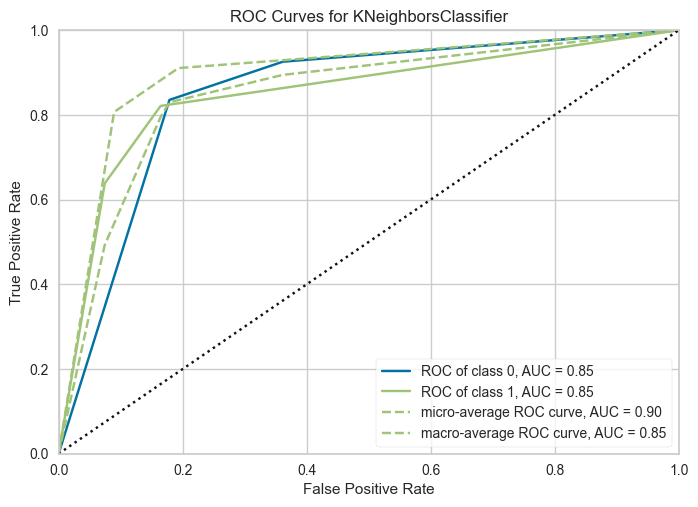

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [154]:
from yellowbrick.classifier import (ROCAUC)

classes = ["0", "1"]
visualizer = ROCAUC(model_KNN, classes=classes, is_fitted=True)

visualizer.fit(X_train_res, y_train_res)        # Fit the training data to the visualizer
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()

### (2). ANN (Artificial Neural Network)

### - Parameter Tuning

In [122]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Cross-validate with different size of one hidden layer
for i in range (2, 26):    
    model_ANN1 = MLPClassifier(hidden_layer_sizes=(i), max_iter=1000, random_state=0)
    scores = cross_val_score(estimator=model_ANN1, X=X_train_res, y=y_train_res, cv=5)
    print(i, ":", np.average(scores))

2 : 0.5253924284395198
3 : 0.5667590027700831
4 : 0.5761772853185596
5 : 0.5256694367497692
6 : 0.5515235457063712
7 : 0.5144044321329642
8 : 0.705078485687904
9 : 0.7195752539242845
10 : 0.7099722991689751
11 : 0.7396121883656509
12 : 0.6869806094182825
13 : 0.7068328716528163
14 : 0.6549399815327794
15 : 0.7177285318559556
16 : 0.7172668513388735
17 : 0.6882733148661127
18 : 0.7285318559556786
19 : 0.6920590951061865
20 : 0.6455216989843029
21 : 0.7255771006463527
22 : 0.7225300092336103
23 : 0.7037857802400739
24 : 0.6808864265927979
25 : 0.690489381348107


In [124]:
# Cross-validate with different size of two hidden layer
for i in range (2, 26):    
    model_ANN2 = MLPClassifier(hidden_layer_sizes=(i,i), max_iter=1000, random_state=0)
    scores = cross_val_score(estimator=model_ANN2, X=X_train_res, y=y_train_res, cv=5)
    print(i, ":", np.average(scores))

2 : 0.5
3 : 0.6036934441366575
4 : 0.59067405355494
5 : 0.6233610341643583
6 : 0.6611265004616805
7 : 0.5290858725761773
8 : 0.6842105263157896
9 : 0.6501385041551246
10 : 0.638134810710988
11 : 0.6909510618651893
12 : 0.6843951985226224
13 : 0.6534626038781164
14 : 0.6053554939981532
15 : 0.694275161588181
16 : 0.6942751615881809
17 : 0.6197599261311173
18 : 0.7191135734072022
19 : 0.6937211449676824
20 : 0.7012927054478301
21 : 0.6692520775623269
22 : 0.7040627885503232
23 : 0.6492151431209602
24 : 0.6698984302862419
25 : 0.6819021237303786


### - Model Building on Test dataset

Accuracy: 0.6110562685093781
              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1699
           1       0.27      0.81      0.40       327

    accuracy                           0.61      2026
   macro avg       0.60      0.69      0.56      2026
weighted avg       0.83      0.61      0.66      2026



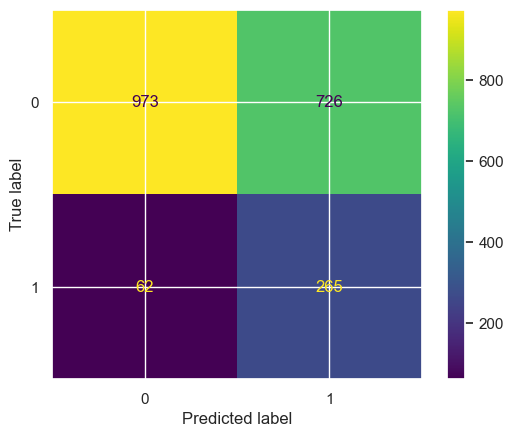

In [134]:
# Based on the above validation, one hidden layer with size of 11 is the most appropirate to choose for modelling
# Build the model
ANN = MLPClassifier(hidden_layer_sizes=(11), max_iter=1000, random_state=0)
model_ANN = ANN.fit(X_train_res, y_train_res)

# Using the model to predict the results based on the test dataset
y_test_pred_ANN = model_ANN.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred_ANN)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print(classification_report(y_test, y_test_pred_ANN))

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_test_pred_ANN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### - Modeling building on Validation dataset

Validation Accuracy: 0.6292412091301666
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      1386
           1       0.26      0.86      0.40       235

    accuracy                           0.63      1621
   macro avg       0.61      0.73      0.57      1621
weighted avg       0.86      0.63      0.68      1621



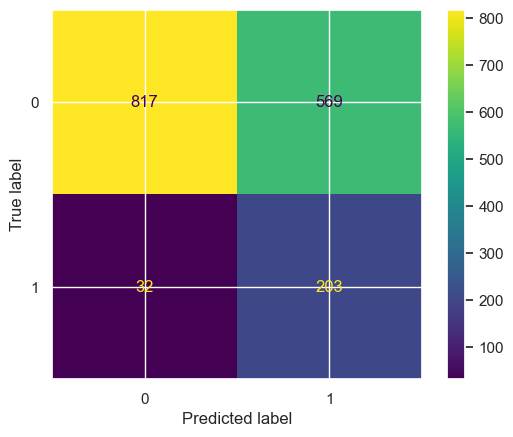

In [137]:
# Predict on the validation set
y_val_pred_ANN = model_ANN.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred_ANN)
print(f"Validation Accuracy: {val_accuracy}")

# Generate a classification report
print(classification_report(y_val, y_val_pred_ANN))  # Corrected: Added closing parenthesis

# Plotting confusion matrix
cm = confusion_matrix(y_val, y_val_pred_ANN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### - PR Curve

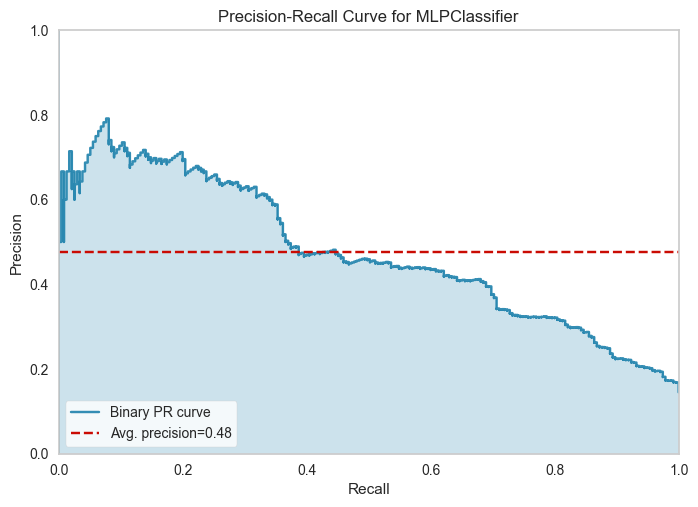

<Axes: title={'center': 'Precision-Recall Curve for MLPClassifier'}, xlabel='Recall', ylabel='Precision'>

In [155]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model_ANN, is_fitted=True)
viz.fit(X_train_res, y_train_res)
viz.score(X_val, y_val)
viz.show()

### - ROC-AUC

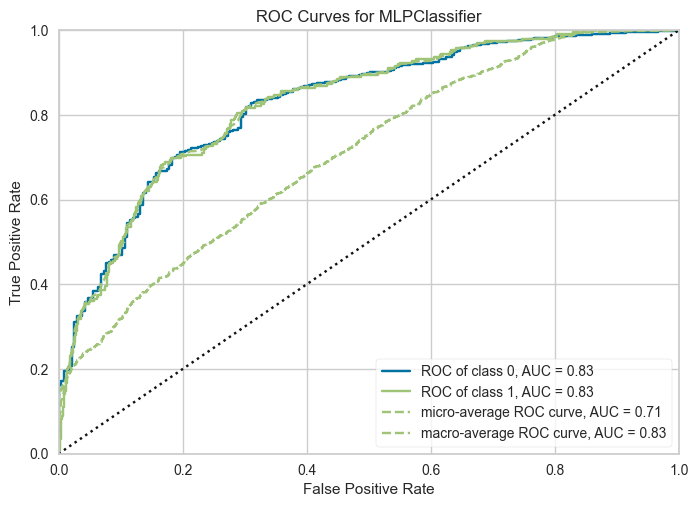

<Axes: title={'center': 'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [156]:
from yellowbrick.classifier import (ROCAUC)

classes = ["0", "1"]
visualizer = ROCAUC(model_ANN, classes=classes, is_fitted=True)

visualizer.fit(X_train_res, y_train_res)        # Fit the training data to the visualizer
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()

## (3). Decision Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Fit the Decision Tree model on the resampled training set
model_dt = dt_classifier.fit(X_train_res, y_train_res)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_val_pred = dt_classifier.predict(X_val)
y_test_pred = dt_classifier.predict(X_test)

# Accuracy
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.9130166563849476
Test Accuracy: 0.9027640671273445

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1386
           1       0.68      0.74      0.71       235

    accuracy                           0.91      1621
   macro avg       0.82      0.84      0.83      1621
weighted avg       0.92      0.91      0.91      1621


Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1699
           1       0.68      0.76      0.72       327

    accuracy                           0.90      2026
   macro avg       0.82      0.84      0.83      2026
weighted avg       0.91      0.90      0.90      2026



### - Hyperparameter Tuning

In [164]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [172]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]  
}

# Initialize the classifier
dt = DecisionTreeClassifier(random_state=0)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')

# Fit it to the data
final_model_dt = grid_search.fit(X_train_res, y_train_res)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.933702677746999


### - Best Final Decision Tree Model on Test dataset and Validation dataset

In [173]:
# Use the best estimator to make predictions on the test set
y_test_pred = final_model_dt.predict(X_test)

# Generate and print the test classification report
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


# Use the best estimator to make predictions on the validation set
y_val_pred = final_model_dt.predict(X_val)

# Generate and print the validation classification report
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))


Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1699
           1       0.67      0.79      0.72       327

    accuracy                           0.90      2026
   macro avg       0.82      0.86      0.83      2026
weighted avg       0.91      0.90      0.91      2026


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1386
           1       0.66      0.82      0.73       235

    accuracy                           0.91      1621
   macro avg       0.81      0.87      0.84      1621
weighted avg       0.92      0.91      0.92      1621



### - PR Curve

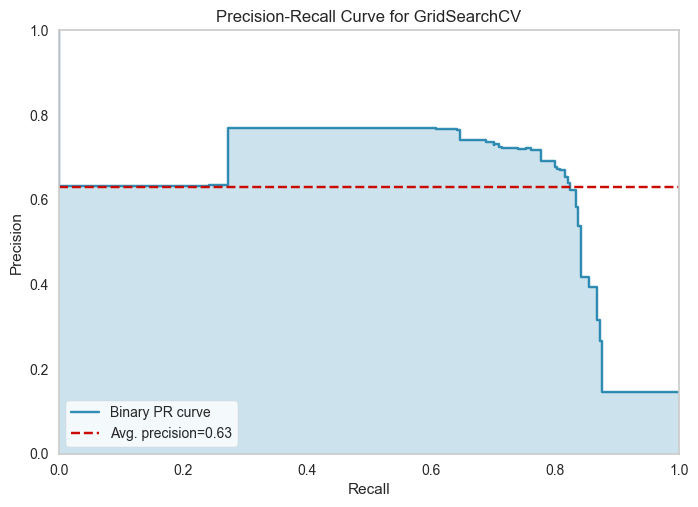

<Axes: title={'center': 'Precision-Recall Curve for GridSearchCV'}, xlabel='Recall', ylabel='Precision'>

In [168]:
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt


# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(final_model_dt, is_fitted=True)
viz.fit(X_train_res, y_train_res)
viz.score(X_val, y_val)
viz.show()

### - ROC-AUC

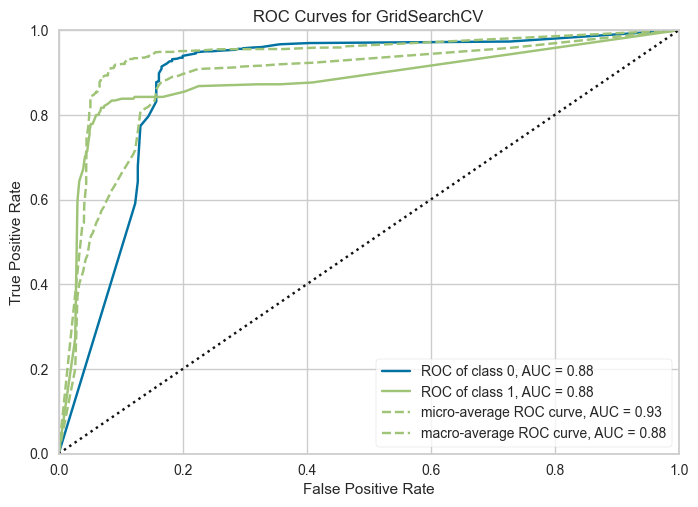

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [174]:
from yellowbrick.classifier import (ROCAUC)

classes = ["0", "1"]
visualizer = ROCAUC(final_model_dt, classes=classes, is_fitted=True)

visualizer.fit(X_train_res, y_train_res)        # Fit the training data to the visualizer
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()

## (4). Random Forest Model

### - Build and Train the Random Forest Model

In [175]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to the resampled training data
rf_classifier.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=0)

### - Evaluate the Model

In [177]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Validation Accuracy: 0.9481801357186922
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1386
           1       0.82      0.83      0.82       235

    accuracy                           0.95      1621
   macro avg       0.89      0.90      0.90      1621
weighted avg       0.95      0.95      0.95      1621

Test Accuracy: 0.9466929911154985
Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1699
           1       0.84      0.83      0.83       327

    accuracy                           0.95      2026
   macro avg       0.90      0.90      0.90      2026
weighted avg       0.95      0.95      0.95      2026



### - Hyperparameter Tuning

In [178]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit it to the data
rf_grid_search.fit(X_train_res, y_train_res)

# Print the best parameters and the best score
print("Best parameters:", rf_grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


### - Fit into the Model with Best Parameters

In [186]:
from sklearn.ensemble import RandomForestClassifier


best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

best_params = rf_grid_search.best_params_

# Create a new model instance with the best parameters
best_rf_classifier = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=0
)

# Fit the model to the resampled training data
best_rf_model = best_rf_classifier.fit(X_train_res, y_train_res)


### - Evaluation on the Model with Best Parameters

Validation Accuracy: 0.9500308451573103
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1386
           1       0.83      0.83      0.83       235

    accuracy                           0.95      1621
   macro avg       0.90      0.90      0.90      1621
weighted avg       0.95      0.95      0.95      1621



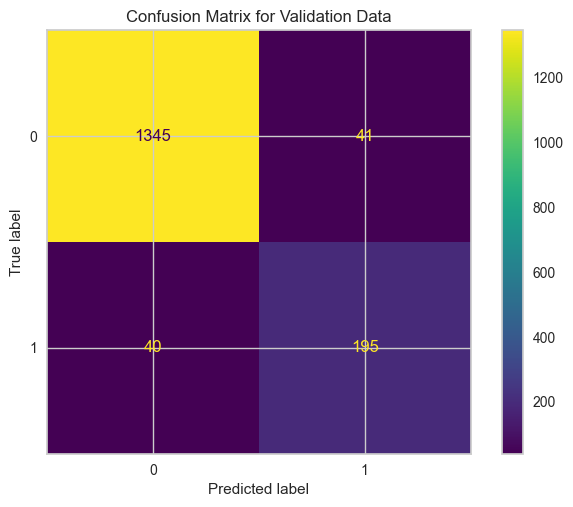

Test Accuracy: 0.9447186574531096
Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1699
           1       0.83      0.82      0.83       327

    accuracy                           0.94      2026
   macro avg       0.90      0.90      0.90      2026
weighted avg       0.94      0.94      0.94      2026



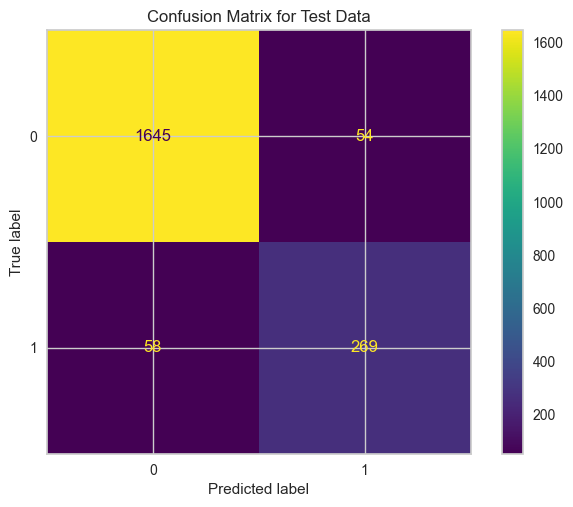

In [185]:
# Validation set evaluation
y_val_pred = best_rf_classifier.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Plot the confusion matrix for the validation set
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Validation Data')
plt.show()

# Test set evaluation
y_test_pred = best_rf_classifier.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Test Data')
plt.show()


### - PR Curve

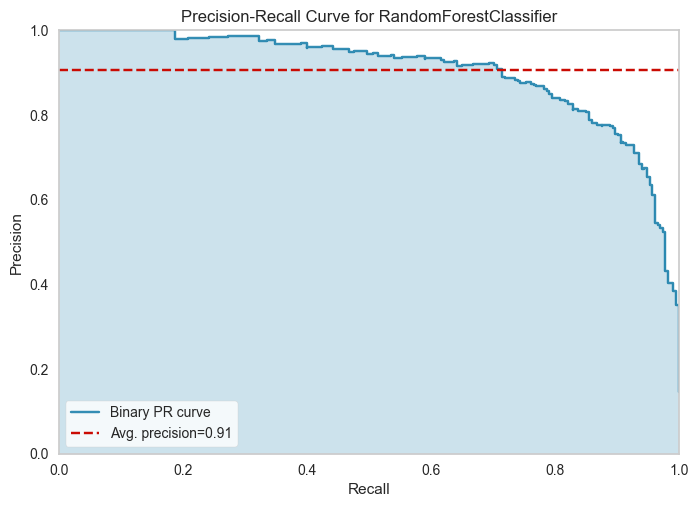

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [187]:
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(best_rf_model, is_fitted=True)
viz.fit(X_train_res, y_train_res)
viz.score(X_val, y_val)
viz.show()

### - ROC-AUC

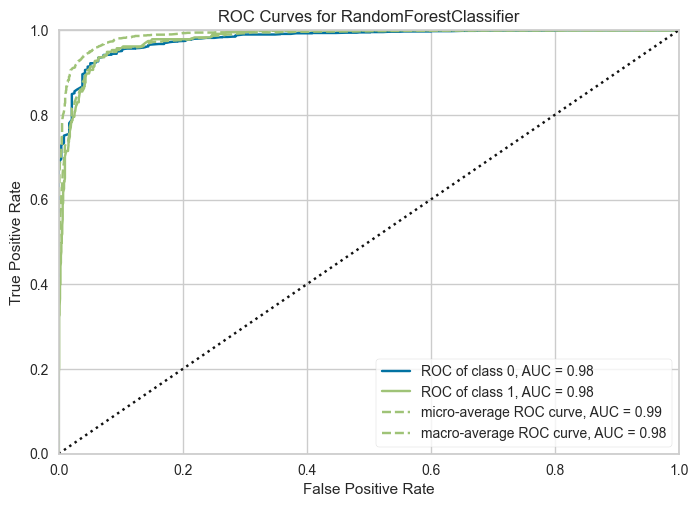

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [188]:
from yellowbrick.classifier import (ROCAUC)

classes = ["0", "1"]
visualizer = ROCAUC(best_rf_model, classes=classes, is_fitted=True)

visualizer.fit(X_train_res, y_train_res)        # Fit the training data to the visualizer
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()